In [28]:
import pandas as pd
import numpy as np
from src.utils.path_utils import get_processed_data_dir

path = str(get_processed_data_dir()) + "/emg_data.npz"

npz_file = np.load(path)
data = npz_file['data']
labels = npz_file['labels']

In [22]:
for key in npz_file.keys():
    print("variable name:", key          , end="  ")
    print("type: "+ str(npz_file[key].dtype) , end="  ")
    print("shape:"+ str(npz_file[key].shape))

variable name: data  type: float64  shape:(17136, 500)
variable name: labels  type: int64  shape:(17136,)


In [23]:
# Create a DataFrame from the data array and add column names
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(data.shape[1])])
df['label'] = labels

In [33]:
labels.shape

(17136,)

In [24]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,label
0,0.038155,-0.205794,-0.203699,-0.200513,-0.124349,0.012482,-0.175835,-0.134049,-0.031697,-0.104167,...,0.464708,0.653930,0.833558,0.270994,-0.538124,-1.164346,-1.290898,-0.281612,-0.220673,1
1,1.452226,1.192294,-0.635864,-0.535719,-0.503729,-1.033539,-0.808583,-0.994236,-0.296430,0.918056,...,-0.036598,-0.173073,-0.211224,-0.153519,-0.181025,-0.101719,-0.177454,-0.090945,0.134667,1
2,-0.255667,0.078934,0.052661,0.111031,0.012792,0.191634,0.222245,0.135816,0.171415,0.110625,...,0.096760,-0.037433,0.000198,-0.089941,-0.121460,-0.124798,-0.125583,-0.062815,-0.067792,1
3,0.316293,0.452295,0.522186,1.355415,1.547817,0.833876,-0.289515,-1.481113,-1.965215,-2.022541,...,0.367397,-0.024128,-0.004412,0.020843,-0.338458,-0.110815,0.029717,-0.031728,-0.062182,1
4,-0.026841,-0.014667,0.010884,-0.031213,0.005490,-0.029454,0.053924,0.401507,0.836349,0.765643,...,-0.147014,-0.089307,-0.099948,-0.165881,-0.258902,-0.620750,-0.447155,0.200819,0.354791,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,1.108463,0.919264,0.294494,0.153645,-0.566332,-0.584857,-0.198631,-0.026111,0.024139,0.028614,...,0.240711,1.057955,1.297828,1.056926,1.057684,-0.024254,0.277318,-0.632245,-1.881061,28
17132,0.133935,0.795425,0.682858,0.966281,0.249961,-0.539304,-0.478650,-0.508195,-0.674452,-0.834662,...,-0.209771,-0.146258,-0.336379,-0.123760,0.039852,-0.007408,0.067513,0.045484,0.082678,28
17133,0.444929,-0.075503,-1.464416,-0.998062,-0.397834,-0.065784,-0.211370,0.709225,0.549696,-0.004756,...,0.212674,0.175772,-0.068985,0.111385,0.266284,0.240320,0.170299,0.221013,0.213540,28
17134,0.156821,0.144215,0.103504,0.038915,0.091690,-0.016036,-0.082869,-0.075264,0.013169,-0.050435,...,-0.016599,-0.059990,0.046468,-0.026039,-0.177029,-0.033420,0.012849,0.479603,0.686102,28


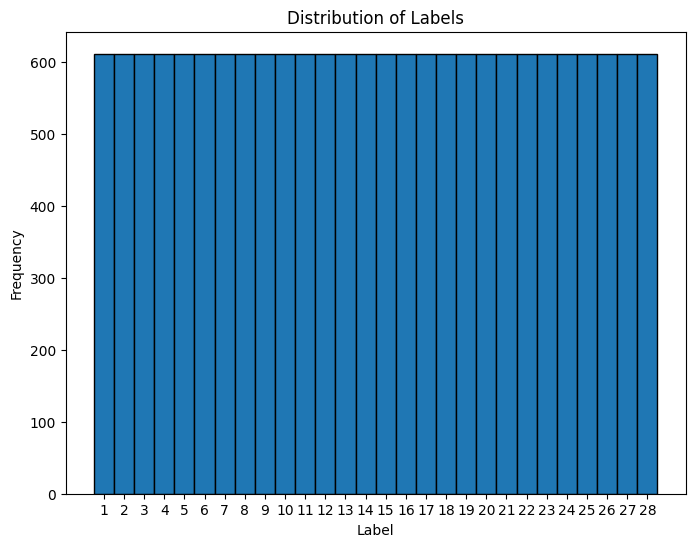

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram bins for integer labels
bins = np.arange(labels.min(), labels.max() + 2) - 0.5

plt.figure(figsize=(8, 6))
plt.hist(labels, bins=bins, edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(labels.min(), labels.max() + 1))
plt.show()

In [1]:
from src.models.example_ANN import SimpleANN

In [34]:
model = SimpleANN(input_shape=data.shape[1], num_classes=29)

In [36]:
model.train(X_train=data, y_train=labels, X_val=data, y_val=labels)

Epoch 1/10
536/536 - 4s - 7ms/step - accuracy: 0.0801 - loss: 3.2124 - val_accuracy: 0.1490 - val_loss: 3.0333
Epoch 2/10
536/536 - 3s - 6ms/step - accuracy: 0.1100 - loss: 3.0959 - val_accuracy: 0.1914 - val_loss: 2.8809
Epoch 3/10
536/536 - 3s - 5ms/step - accuracy: 0.1373 - loss: 2.9942 - val_accuracy: 0.2287 - val_loss: 2.7505
Epoch 4/10
536/536 - 2s - 4ms/step - accuracy: 0.1543 - loss: 2.9174 - val_accuracy: 0.2616 - val_loss: 2.6584
Epoch 5/10
536/536 - 2s - 4ms/step - accuracy: 0.1768 - loss: 2.8357 - val_accuracy: 0.2825 - val_loss: 2.5563
Epoch 6/10
536/536 - 2s - 4ms/step - accuracy: 0.1880 - loss: 2.7843 - val_accuracy: 0.3074 - val_loss: 2.4826
Epoch 7/10
536/536 - 2s - 4ms/step - accuracy: 0.2025 - loss: 2.7310 - val_accuracy: 0.3259 - val_loss: 2.4223
Epoch 8/10
536/536 - 2s - 4ms/step - accuracy: 0.2211 - loss: 2.6776 - val_accuracy: 0.3452 - val_loss: 2.3523
Epoch 9/10
536/536 - 2s - 3ms/step - accuracy: 0.2223 - loss: 2.6515 - val_accuracy: 0.3667 - val_loss: 2.2931
E